<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Longer_Term_Crypto_Degrees_of_Freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

19:38:58 Starting...
19:38:58 Installing yfinance into Google notebook...
19:39:06 Installing arch into Google notebook...
19:39:19 Initialized.


In [2]:
try:
    from google.colab import drive
    nprint("Google Drive %s." % drive.mount("/content/drive"))

except:
    raise

Mounted at /content/drive
19:39:43 Mounted Google Drive.


In [3]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=data.columns.droplevel(1)
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
data.drop(data.index[-1],inplace=True) # remove the final row in case it is not complete
data.drop(data.index[data.index<(fd:='2024-07-31')],inplace=True) # remove data before 2024-07-31
data=data[data.columns[data.apply(lambda x:x.first_valid_index())<=fd]] # remove newly added tickers after 2024-07-31
display(data)

Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
UTC Date,,,,,,,,,,,,,,
2024-07-31,2.001567,-2.358840,-4.200110,-2.365537,-0.047707,-2.837462,-2.073961,-1.452662,-2.375695,-2.164731,-6.382353,-3.024153,-1.936113,-2.775783
2024-08-01,8.726297,0.036957,-0.288448,1.151609,1.518046,-2.302137,-0.996922,-0.871557,0.491381,-0.799247,-0.816839,0.230222,-1.248259,-0.608589
2024-08-02,-5.610969,-8.265604,-7.564218,-6.025579,-4.053610,-6.341034,-6.167053,-6.727354,-7.544241,-6.546150,-7.190371,-8.025336,-3.852546,-5.256278
2024-08-03,-4.481945,-3.931834,-4.592054,-1.198185,-13.779336,-3.094934,-2.771871,-2.837828,-1.918234,-0.578258,-2.866894,0.234600,-2.236539,-0.486530
2024-08-04,-7.831497,-6.321154,-8.886479,-4.229510,-7.939911,-4.046256,-3.804583,-7.507444,-6.932854,-3.440406,-6.289529,-7.255568,-5.467211,-3.531816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-28,9.450514,3.183482,2.309715,1.026155,2.963530,3.975373,2.176548,2.055176,1.955996,0.079610,2.145824,1.649792,1.727440,6.463751
2024-12-29,-6.272523,-5.000130,-2.810090,-1.685678,-4.745754,-3.029930,-3.817375,-1.416388,-4.767550,-2.366509,-3.704540,-4.182955,-5.071828,-6.341016
2024-12-30,-3.054976,0.360369,1.195787,-0.956064,-1.876412,-0.163914,-0.423346,0.190245,-1.671194,1.130461,-0.938306,2.448412,-1.840672,1.058281


Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
Return (%),,,,,,,,,,,,,,
AAVE-USD,1.000000,0.621365,0.525370,0.452570,0.616066,0.326383,0.640422,0.655541,0.657948,0.408008,0.403675,0.685427,0.172274,0.382584
AVAX-USD,0.621365,1.000000,0.671176,0.677658,0.747698,0.609796,0.738706,0.703659,0.821032,0.615634,0.638235,0.635450,0.352386,0.519214
BCH-USD,0.525370,0.671176,1.000000,0.771830,0.549388,0.667359,0.791652,0.790129,0.606951,0.626181,0.653342,0.697781,0.368392,0.579571
BTC-USD,0.452570,0.677658,0.771830,1.000000,0.514366,0.764930,0.665308,0.803034,0.556588,0.551304,0.669927,0.607357,0.236681,0.455609
COMP-USD,0.616066,0.747698,0.549388,0.514366,1.000000,0.466718,0.731332,0.635320,0.672743,0.505730,0.576053,0.591246,0.321966,0.506083
DOGE-USD,0.326383,0.609796,0.667359,0.764930,0.466718,1.000000,0.572391,0.620521,0.443251,0.479081,0.783467,0.488552,0.304627,0.400104
ETC-USD,0.640422,0.738706,0.791652,0.665308,0.731332,0.572391,1.000000,0.821770,0.680708,0.688226,0.676741,0.772848,0.501587,0.594997
ETH-USD,0.655541,0.703659,0.790129,0.803034,0.635320,0.620521,0.821770,1.000000,0.652354,0.581463,0.632932,0.731703,0.263978,0.519828
LINK-USD,0.657948,0.821032,0.606951,0.556588,0.672743,0.443251,0.680708,0.652354,1.000000,0.605241,0.459925,0.665866,0.342151,0.533028


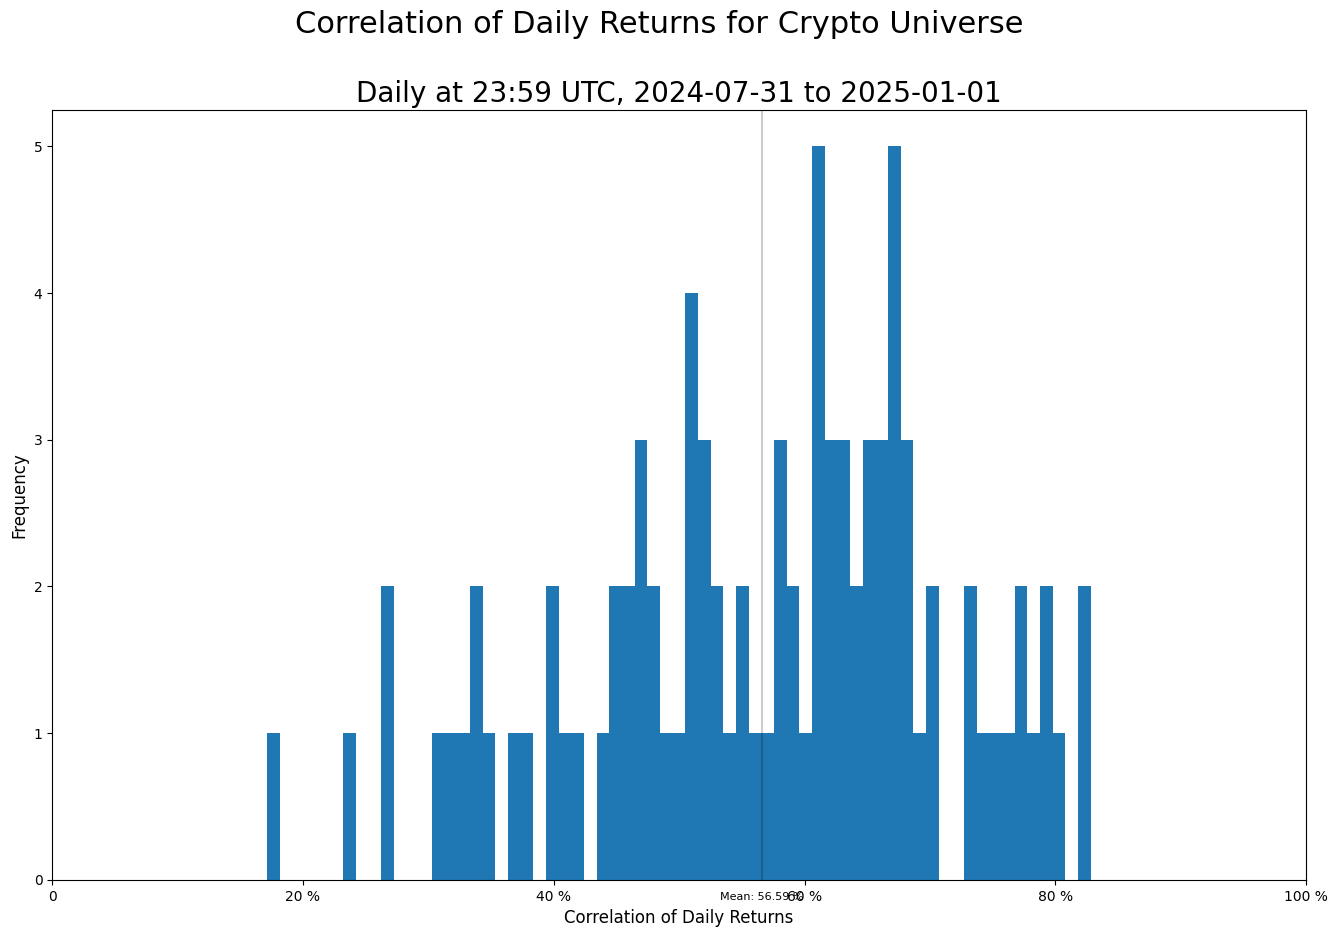

In [4]:
display(rho:=data.corr())
samples=pd.DataFrame({"row":[],"column":[],"correlation":[]}).set_index(["row","column"])

for i in range(rho.shape[0]):
    for j in range(i+1,rho.shape[0]):
        samples.loc[(rho.index[i],rho.columns[j]),"correlation"]=rho.iloc[i,j]*hundred

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
counts,bins,patches=plot.hist(samples['correlation'],bins=np.linspace(zero,hundred,100))
plot.set_xlabel("Correlation of Daily Returns",fontsize=12)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel("Frequency",fontsize=12)
plot.yaxis.set_major_formatter(CountLabels(0))
plot.set_title(subtitle:="Daily at 23:59 UTC, %s to %s" % (data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,hundred)
plot.axvline(m:=samples['correlation'].mean(),color='black',alpha=0.2)
plot.text(m,zero,"\nMean: {:.2f} %".format(m),ha='center',va='top',fontsize=8)
figure.suptitle(title:="Correlation of Daily Returns for Crypto Universe",fontsize=22)
figure.savefig((filepath:='/content/drive/MyDrive/')+title+(filetype:='.pdf'),dpi=300,bbox_inches='tight')

In [5]:
if 'random_seed' not in locals():
    random_seed=12345678 # don't reset the seed multiple times in one session

if random_seed is not None:
    generator=np.random.default_rng(seed=random_seed)
    nprint("Using NumPy random seed %d." % random_seed)
    random_seed=None

else:
    nprint("Continuing random sequence from prior seed.")

19:39:49 Using NumPy random seed 12345678.


In [6]:
results=pd.DataFrame({"Sample":range(1,(n:=1000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^503-1 choices
    returns=pd.DataFrame()

    for ticker in data[generator.choice(data.columns,generator.integers(1,data.shape[1]+1),replace=False)]:
        returns[ticker]=data[ticker]
        returns=returns.copy() # 'cos it frags, apparently

    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],returns.columns))) # list of coins in portfolio
    returns['Portfolio']=returns.mean(axis=1) # equal weighted portfolio return
    select=returns["Portfolio"]>zero if filter=="Up" else returns["Portfolio"]<zero if filter=="Down" else ~returns["Portfolio"].isna()
    results.loc[i,"Assets"]=returns.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=returns.loc[select,[a for a in returns if a!="Portfolio"]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=returns.loc[select,'Portfolio'].var() # variance of portfolio returns for same period as individual returns

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

19:39:49 Beginning analysis for 1,000 trials.


  0%|          | 0/1000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Independent,Effective D.o.F.
Sample,,,,,
1,14.0,15.164181,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,S...",2.003703,1.849875
2,9.0,15.099703,"AAVE,AVAX,BTC,ETH,LINK,LTC,SHIB,UNI,XLM",3.168939,1.888809
3,8.0,16.525091,"COMP,DOGE,ETH,LTC,SHIB,UNI,XLM,XTZ",3.987472,1.930384
4,7.0,15.846728,"BCH,ETH,LINK,LTC,SHIB,UNI,XTZ",3.705111,1.636664
5,10.0,15.230436,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETH,SHIB,UNI,XLM",2.851542,1.872266
...,...,...,...,...,...
995,9.0,14.251971,"BCH,BTC,COMP,DOGE,ETH,LTC,SHIB,UNI,XTZ",2.699952,1.704997
996,7.0,19.589887,"AAVE,AVAX,COMP,DOGE,LINK,SHIB,XTZ",4.600212,1.643781
998,8.0,14.840005,"BCH,BTC,ETC,LTC,SHIB,UNI,XLM,XTZ",3.468696,1.869916


19:40:21 Done.


In [7]:
from statsmodels.api import OLS,add_constant
Nmin,Nmax=five,results["Assets"].max()-one
design=results[select:=(results["Assets"]>=Nmin)&(results["Assets"]<=Nmax)][[yn:="Effective D.o.F.",xn:="Assets"]].drop_duplicates()
model=OLS(design[yn],add_constant(design[xn])).fit()
nprint(model.summary())
nprint("Implied regression factor count: {:.2f} +/- {:.2g} for data in [{:,.0f},{:,.0f}].".format(Kreg:=one/model.params.iloc[1],model.bse.iloc[1]/model.params.iloc[1]**4,Nmin,Nmax))
final=results[results[xn]==results[xn].max()].drop_duplicates(xn)
Nstar,Nact=tuple(final.iloc[-1][[yn,xn]])
rho=(Nact-Nstar)/((Nact-one)*Nstar)
nprint("Effective D.o.F. Limit {:,.2f}, Implied Correlation {:.2f} %.".format(Nstar,rho*hundred))
Khat=Nact/Nstar
nprint("Implied limiting factor count: {:.0f}.".format(Khat))

19:40:24                             OLS Regression Results                            
Dep. Variable:       Effective D.o.F.   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     79.19
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           6.81e-18
Time:                        19:40:24   Log-Likelihood:                 314.74
No. Observations:                 595   AIC:                            -625.5
Df Residuals:                     593   BIC:                            -616.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5884      0.021     76.189

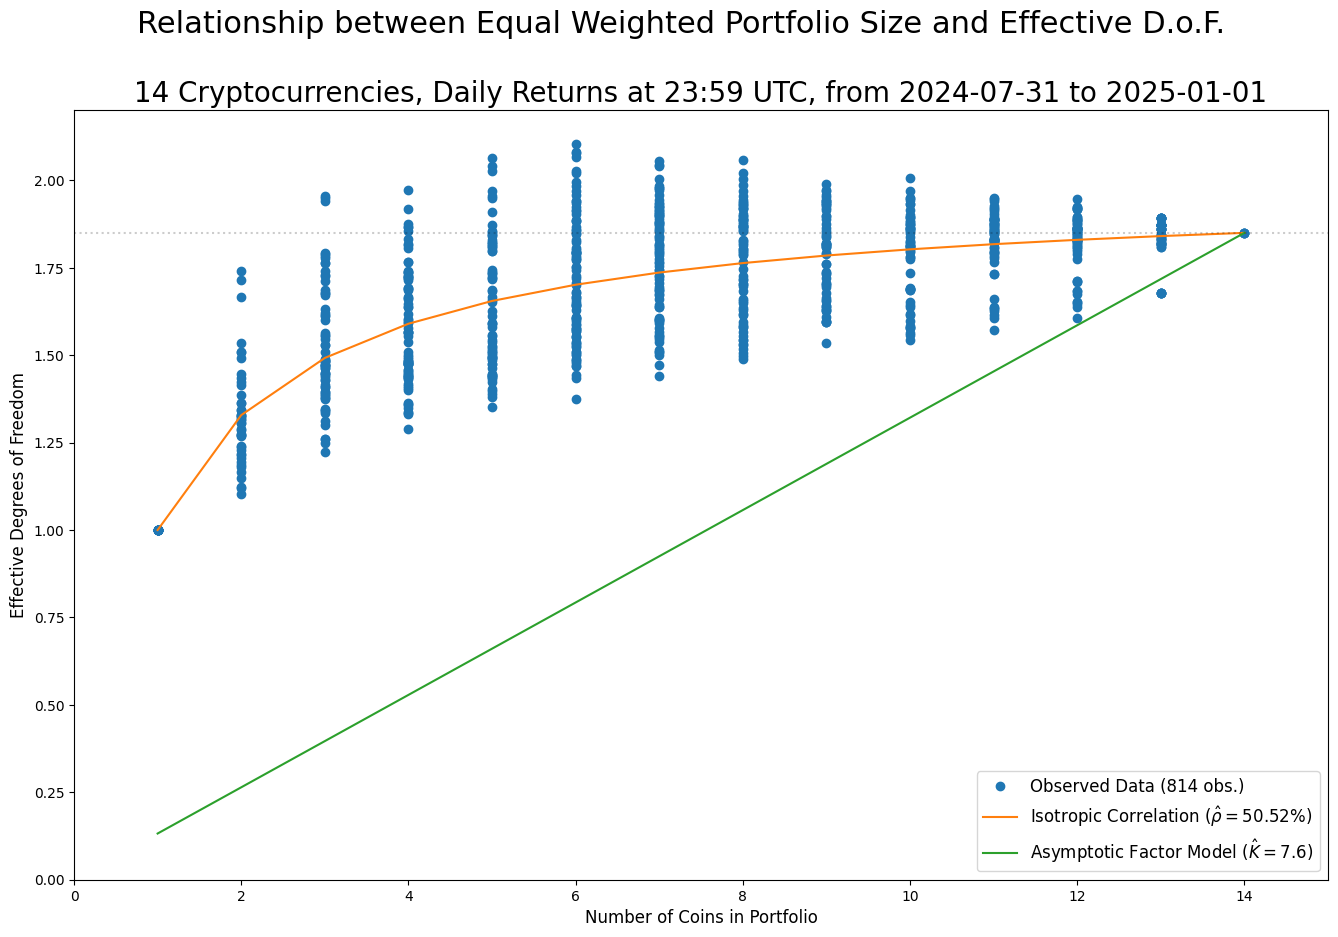

In [8]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=results["Assets"].to_numpy(),y:=results["Effective D.o.F."].to_numpy(),'o',label='Observed Data (%d obs.)' % results.shape[0])
plot.plot(xp:=np.unique(np.sort(x)),xp/(one+(xp-one)*rho),'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred))
plot.plot(xp,xp/Khat,'-',label="Asymptotic Factor Model ($\\hat{K} = %.1f$)" % Khat)
#plot.plot(xpp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xpp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg)
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F.",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (data.shape[1],data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

19:40:25 Isotropic Model: Total Chi Squared 9.65135 for 12 d.o.f., p Value = 0.646517.
19:40:25 Factor Model: Total Chi Squared 19.6371 for 7 d.o.f., p Value = 0.00640936.


Mean   St.Dev. Sample  Std.Err. Isotropic                      \
                                                Model     Error   Z Score   
Assets                                                                      
1.0     1.000000  0.000000     14  0.000000  1.000000  0.000000       NaN   
2.0     1.328952  0.148800     44  0.022432  1.328695  0.000257  0.011474   
3.0     1.525691  0.174952     67  0.021374  1.492186  0.033505  1.567588   
4.0     1.582598  0.163112     80  0.018236  1.590008 -0.007410 -0.406345   
5.0     1.645553  0.186663     72  0.021998  1.655110 -0.009557 -0.434463   
6.0     1.717712  0.180057     89  0.019086  1.701556  0.016156  0.846458   
7.0     1.770627  0.157326     82  0.017374  1.736361  0.034267  1.972314   
8.0     1.772819  0.152992     70  0.018286  1.763413  0.009407  0.514414   
9.0     1.785986  0.125481     59  0.016336  1.785043  0.000942  0.057692   
10.0    1.784936  0.124701     59  0.016235  1.802734 -0.017798 -1.096277   
11.0    1.822736  0.090645     62  0.011512  1.817471  0.005266  0.457422   
12.0    1.825274  0.079572     65  0.009870  1.829937 -0.004663 -0.472454   
13.0    1.835536  0.060550     47  0.008832  1.840619 -0.005083 -0.575569   

                    Factor                                
         Chi Sq.     Model     Error   Z Score   Chi Sq.  
Assets                                                    
1.0          NaN       NaN       NaN       NaN       NaN  
2.0     0.000132       NaN       NaN       NaN       NaN  
3.0     2.457331       NaN       NaN       NaN       NaN  
4.0     0.165116       NaN       NaN       NaN       NaN  
5.0     0.188758  1.692347 -0.046794 -2.127167  4.524839  
6.0     0.716491  1.713133  0.004579  0.239889  0.057546  
7.0     3.890022  1.733920  0.036708  2.112815  4.463988  
8.0     0.264622  1.754706  0.018113  0.990567  0.981223  
9.0     0.003328  1.775492  0.010494  0.642352  0.412616  
10.0    1.201823  1.796279 -0.011343 -0.698668  0.488137  
11.0    0.209235  1.817065  0.005671  0.492647  0.242701  
12.0    0.223213  1.837851 -0.012578 -1.274390  1.624070  
13.0    0.331279  1.858638 -0.023102 -2.615710  6.841940

19:40:25 F Test for Equivalence of Descriptions: F(7,12) = 3.48796, p Value = 0.056023.


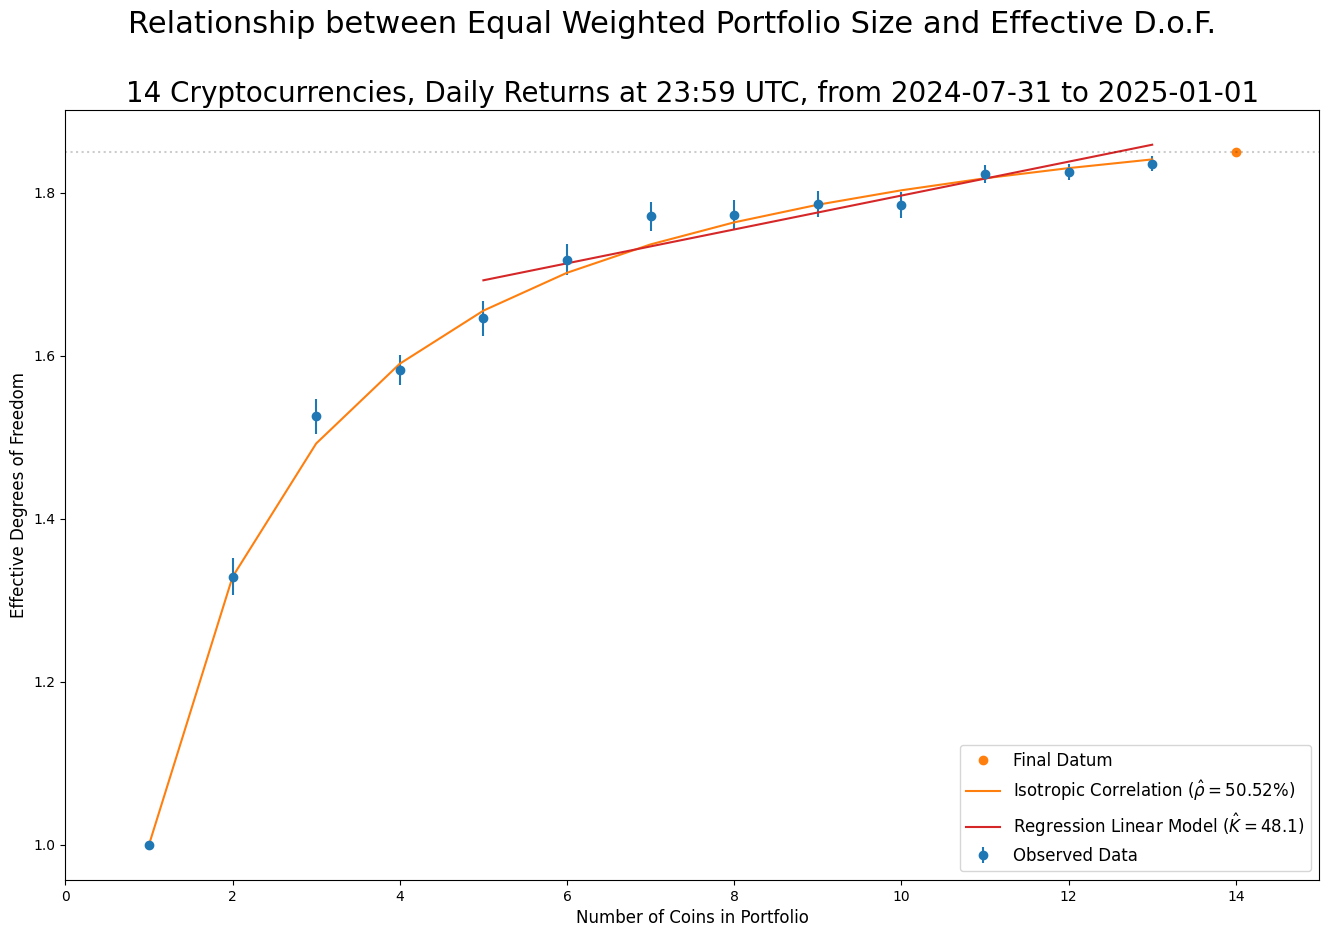

In [9]:
from scipy.stats import chi2,f as fdensity
meta=pd.DataFrame()
meta["Mean"]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta["St.Dev."]=g.std()
meta["Sample"]=g.count()
meta["Std.Err."]=meta["St.Dev."]/meta["Sample"]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))
meta[(l:="Factor","Model")]=list(map(lambda x:model.params.iloc[0]+model.params.iloc[1]*x if x>=Nmin and x<=Nmax else np.nan,meta.index))
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(model.params),chi2(df2).sf(sc22)))
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
display(meta)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta["Mean"],yerr=meta["Std.Err."],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg,color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 2"+filetype,dpi=300,bbox_inches='tight')

In [ ]:
from scipy.stats import chi2,f as fdensity
from scipy.optimize import curve_fit

def nstar(N,*args):
    """Factor model N*(N) function. Parameters are: b2bar, bbar2, s2bar in that order."""
    b2bar,bbar2,s2bar=args
    return N*(b2bar*N+s2bar)/(bbar2*N+s2bar)

meta=pd.DataFrame()
meta[(s:="Sample","Mean")]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta[(s,"St.Dev.")]=g.std()
meta[(s,"Count")]=g.count()
meta[(s,"Std.Err.")]=meta[(s,"St.Dev.")]/meta[(s,"Count")]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta[(s,"Std.Err.")]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))

theta,vee=curve_fit(nstar,xf:=meta.index[1:],meta.loc[xf,(s,"Mean")],p0=(one,one,one/hundred),bounds=(zero,np.inf))
sigmas=np.sqrt(np.diag(vee))
nprint("Fitted linear factor model curve via NLLS: b2bar = %g ± %g, bbar2 = %g ± %g, s2bar = %g ± %g. K* = %g" % (theta[0],sigmas[0],theta[1],sigmas[1],theta[2],sigmas[2],theta[0]/theta[1]))
meta[(l:="Factor","Model")]=list(map(lambda q:nstar(q,*theta),meta.index))
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=(meta[(l,"Error")]/meta[(s,"Std.Err.")]).replace(np.inf,np.nan)
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(theta),chi2(df2).sf(sc22)))

display(meta)
meta.replace(np.nan,"").style.format(precision=3).to_latex(latexfile:=filepath+'meta.tex')
nprint("Wrote meta data to '%s.'" % latexfile)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta[(s,"Mean")],yerr=meta[(s,"Std.Err.")],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xf,zf:=list(map(lambda q:nstar(q,*theta),xf)),'-',label="Linear Factor Model (NLLS fit)",color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 3"+filetype,dpi=300,bbox_inches='tight')

19:40:27 Isotropic Model: Total Chi Squared 9.65135 for 12 d.o.f., p Value = 0.646517.
19:40:27 Fitted linear factor model curve via NLLS: b2bar = 3.73395e-28 ± 0.182231, bbar2 = 7.04514 ± 1.82505e+07, s2bar = 16.1197 ± 4.17581e+07. K* = 5.30004e-29
19:40:27 Factor Model: Total Chi Squared 644.741 for 9 d.o.f., p Value = 5.183e-133.


Sample                           Isotropic                      \
            Mean   St.Dev. Count  Std.Err.     Model     Error   Z Score   
Assets                                                                     
1.0     1.000000  0.000000    14  0.000000  1.000000  0.000000       NaN   
2.0     1.328952  0.148800    44  0.022432  1.328695  0.000257  0.011474   
3.0     1.525691  0.174952    67  0.021374  1.492186  0.033505  1.567588   
4.0     1.582598  0.163112    80  0.018236  1.590008 -0.007410 -0.406345   
5.0     1.645553  0.186663    72  0.021998  1.655110 -0.009557 -0.434463   
6.0     1.717712  0.180057    89  0.019086  1.701556  0.016156  0.846458   
7.0     1.770627  0.157326    82  0.017374  1.736361  0.034267  1.972314   
8.0     1.772819  0.152992    70  0.018286  1.763413  0.009407  0.514414   
9.0     1.785986  0.125481    59  0.016336  1.785043  0.000942  0.057692   
10.0    1.784936  0.124701    59  0.016235  1.802734 -0.017798 -1.096277   
11.0    1.822736  0.090645    62  0.011512  1.817471  0.005266  0.457422   
12.0    1.825274  0.079572    65  0.009870  1.829937 -0.004663 -0.472454   
13.0    1.835536  0.060550    47  0.008832  1.840619 -0.005083 -0.575569   

                    Factor                                   
         Chi Sq.     Model     Error    Z Score     Chi Sq.  
Assets                                                       
1.0          NaN  0.695869  0.304131        NaN         NaN  
2.0     0.000132  1.067177  0.261775  11.669495  136.177122  
3.0     2.457331  1.298052  0.227639  10.650400  113.431020  
4.0     0.165116  1.455494  0.127104   6.969761   48.577567  
5.0     0.188758  1.569731  0.075822   3.446694   11.879699  
6.0     0.716491  1.656401  0.061311   3.212331   10.319072  
7.0     3.890022  1.724409  0.046219   2.660257    7.076968  
8.0     0.264622  1.779195 -0.006376  -0.348672    0.121572  
9.0     0.003328  1.824275 -0.038289  -2.343818    5.493484  
10.0    1.201823  1.862018 -0.077082  -4.747958   22.543101  
11.0    0.209235  1.894080 -0.071343  -6.197306   38.406602  
12.0    0.223213  1.921653 -0.096380  -9.765236   95.359832  
13.0    0.331279  1.945620 -0.110085 -12.464150  155.355032

In [ ]:
from datetime import timedelta
history,returns=download(list(data)).xs('Adj Close',axis=1,level=0),pd.DataFrame()

for c in history:
    if history[c].last_valid_index()!=history.last_valid_index(): # get rid of tickers that have gone stale (this is COIN as returned by Yahoo)
        history.drop(columns=c,inplace=True)

    else:
        returns[c]=history[c].pct_change(fill_method=None)*hundred
        returns.loc[(f:=returns[c].first_valid_index()):(f+timedelta(days=365)),c]=np.nan # set first year of data to NA to avoid launch spikes

returns.index=pd.DatetimeIndex(returns.index).to_period('D')
returns.dropna(inplace=True,how='all')
returns.drop(returns.index[-1],inplace=True) # remove the final row in case it is not complete
returns=returns[[c for c in returns if c not in (vetoes:=['SHIB-USD','UNI-USD'])]].copy() # dropping SHIB (very low values, precision issue) and UNI (step change in 2022 by orders of magnitude)
nprint("Removed %s entirely!" % ", ".join(vetoes))
returns=returns.copy()
returns['Count']=returns.count(axis=1)
returns=returns[returns['Count']>=five]
returns["Portfolio"]=returns.mean(axis=1)
returns["Year"]=returns.index.year
display(returns)

In [ ]:
results=pd.DataFrame({"Sample":range(1,(n:=5000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n,"Period":[np.nan]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^Nmax-1 choices
    period=generator.choice(returns[p:="Year"].unique(),1)[0]
    subset=returns[returns[p]==period][generator.choice(a:=[c for c in returns.columns if '-' in c],generator.integers(1,len(a)+1),replace=False)].copy()
    subset.dropna(inplace=True)
    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],subset.columns))) # list of coins in portfolio
    subset['Portfolio']=subset.mean(axis=1) # equal weighted portfolio return
    results.loc[i,"Assets"]=subset.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=subset[[c for c in subset if '-' in c]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=subset['Portfolio'].var() # variance of portfolio returns for same period as individual returns
    results.loc[i,"Period"]=period

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

In [ ]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
Nmax=results["Assets"].max()-one

for period in sorted(results["Period"].unique()):
    plot.plot(x:=results[select:=results["Period"]==period]["Assets"].to_numpy(),y:=results[select]["Effective D.o.F."].to_numpy(),'o',label=int(period))

plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F. by Year",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (len(a),returns.index[0],returns.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

In [ ]:
variances=returns[[c for c in returns if '-' in c or c in ('Portfolio','Year')]].groupby('Year').var()
variances["Assets"]=variances.count(axis=1)
variances["Independent"]=variances[[c for c in variances if '-' in c]].sum(axis=1)/variances["Assets"]**2
variances[ns:="Effective D.o.F."]=variances["Independent"]/variances["Portfolio"]*variances[na:="Assets"]
variances[nr:="Imputed Correlation"]=(variances[na]-variances[ns])/((variances[na]-one)*variances[ns])*hundred
display(variances)
variances.replace(np.nan,"").T.style.format(precision=2).to_latex(latexfile:=filepath+'variances.tex')
nprint("Wrote variances to '%s.'" % latexfile)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.step(x:=list(map(lambda x:pd.to_datetime(str(x)),[returns.index[0]]+list(map(lambda x:pd.Period(datetime(x,12,31),'D') if x<data.index[-1].year else data.index[-1],variances.index)))),
          y:=np.insert(variances[ns].to_numpy(),0,variances[ns].iloc[0]),'-',where='pre',label='Yahoo! Data') # the code to make x here is heinous, and that is due to Pandas
plot.set_ylabel("Effective D.o.F. ($N^*$)",fontsize=12)
plot.set_ylim(one,three)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.plot(x:=data.index[[0,-1]],y:=[Nstar]*len(x),'-',color='C1',label='Robinhood Data')
plot.legend(fontsize=12)
figure.suptitle(title:="Cryptocurrency Effective Degrees of Freedom by Year",fontsize=22)
plot.set_title(subtitle,fontsize=20)
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')